In [17]:
import matplotlib
import matplotlib.pyplot as plt
import awkward as aw
import numpy as np
import uproot
import hist
import pandas as pd

import pyvista as pv

import os
import glob

In [18]:
path = "/home/b/bkoberg/AGW_LowRad/data_sim/XeSim_Neutron"
version = "cf30af8"
analysis = "20250416_RockAnalysis"
files = "test2_*.root"
file_pattern = os.path.join(path, version, analysis,files)


data = uproot.concatenate(f"{file_pattern}:events/events", library="ak")


# Positions

In [19]:

pos_pri = df_pri[df_pri['type_pri']=='neutron']
pos_pri = pos_pri[['x_pri', 'y_pri', 'z_pri']].sample(frac=0.1, random_state=1)  # Zufällige Auswahl von 10% der Daten



x = pos_pri['x_pri']
y = pos_pri['y_pri']
z = pos_pri['z_pri']

points = np.column_stack((x, y, z))

# PyVista-Plot
cloud = pv.PolyData(points)
plotter = pv.Plotter()
plotter.add_mesh(cloud, color="blue", point_size=1, render_points_as_spheres=True)
plotter.show()

NameError: name 'df_pri' is not defined

In [ ]:
# Beispiel-Daten (ersetze durch deine Daten)

print(df['volume'].unique())
pos = df.loc[(df['volume']=='Water') | (df['volume']=='LXeContainer'), ['x','y','z','process']].sample(frac=0.1, random_state=1)  # Zufällige Auswahl von 10% der Daten

x = pos['x']  
y = pos['y'] 
z = pos['z']  

points = np.column_stack((x, y, z))

colors = [
    'red' if process == 'nCapture' else 
    'blue' if process == 'RadioactiveDecay' else 
    'green'  # Standardfarbe für alle anderen Prozesse
    for process in pos['process']
]

colors_rgb = np.array([matplotlib.colors.to_rgb(color) for color in colors])


# PyVista-Plot
cloud = pv.PolyData(points)
cloud["colors"] = colors_rgb 
plotter = pv.Plotter()
plotter.add_mesh(cloud, scalars="colors", rgb=True, point_size=5, render_points_as_spheres=True)
plotter.show()

# Postitions 2D


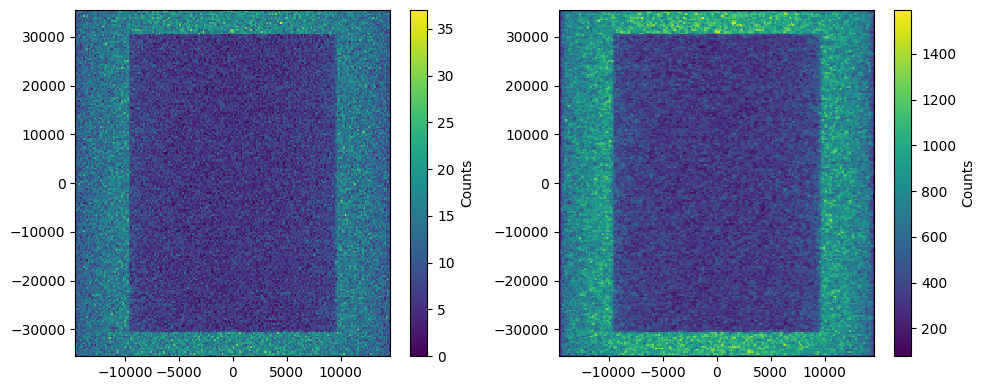

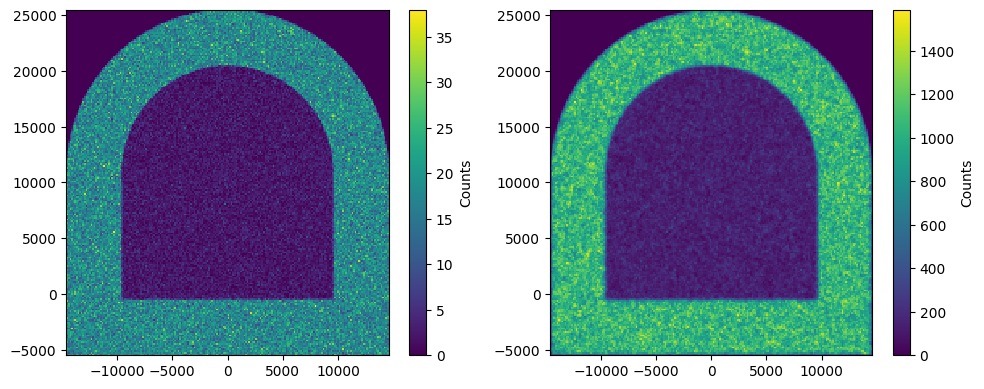

In [59]:
type_pri = aw.flatten(data['type_pri']) #Nur um extra kalmmer wegzukriegen [[neutron],...] -> [neutron,...]
                                        # Wichtig!!! Große Numpy array == großes Problem

x_pri, y_pri, z_pri = (aw.to_numpy(data[type_pri == 'neutron',f'{coord}']) for coord in ['xp_pri', 'yp_pri', 'zp_pri'])
x, y, z = (aw.to_numpy(aw.flatten(data[f'NAct_{coord}'])) for coord in ['x', 'y', 'z'])




fig, axs = plt.subplots(1, 2, figsize=(10, 4))

bins = 200

im2 = axs[1].hist2d(x,y, bins=bins, cmap='viridis')  # 2D-Histogramm
im1 = axs[0].hist2d(x_pri, y_pri, bins=bins, cmap='viridis')  # 2D-Histogramm

# Farbleiste hinzufügen
cbar1 = fig.colorbar(im1[3], ax=axs[0], label='Counts')
cbar2 = fig.colorbar(im2[3], ax=axs[1], label='Counts')

fig.tight_layout()
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(10, 4))

im1 = axs[0].hist2d(x_pri, z_pri, bins=bins, cmap='viridis')  # 2D-Histogramm
im2 = axs[1].hist2d(x, z, bins=bins, cmap='viridis')  # 2D-Histogramm

# Farbleiste hinzufügen
cbar1 = fig.colorbar(im1[3], ax=axs[0], label='Counts')
cbar2 = fig.colorbar(im2[3], ax=axs[1], label='Counts')

fig.tight_layout()
plt.show() 




# Energy

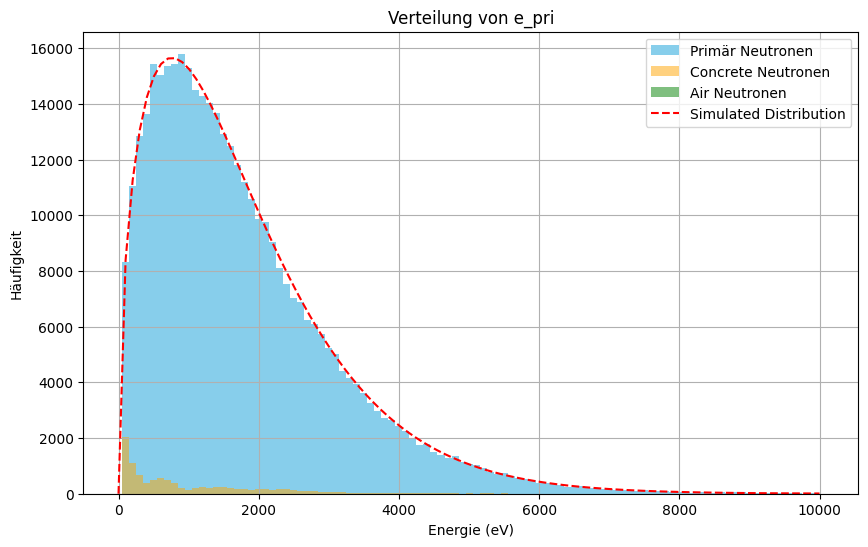

124

In [58]:
vergl = np.loadtxt("/home/b/bkoberg/AGW_LowRad/home/bkoberg/XeSim/notebooks/RadiogenicNeutronDistribution.txt", skiprows=2)

type_step =  aw.flatten(data['Save_type'])

desc = aw.flatten(data['Save_desc'])

e_pri = aw.to_numpy(data[type_pri == 'neutron','e_pri'])
e_con = aw.to_numpy(aw.flatten(data['Save_e'])[np.logical_and(type_step == 'neutron', desc == 'entering Concrete from Rock')])
e_air = aw.to_numpy(aw.flatten(data['Save_e'])[np.logical_and(type_step == 'neutron', desc == 'entering Air from Concrete')])

# Bin-Breite festlegen
bin_width = 100  #
bins = np.arange(e_pri.min(),e_pri.max() + bin_width, bin_width)

# Histogramm erstellen
plt.figure(figsize=(10, 6))
plt.grid()
plt.hist(e_pri, bins=bins, color='skyblue', label='Primär Neutronen')
plt.hist(e_con, bins=bins, color='orange', alpha=0.5, label='Concrete Neutronen')
plt.hist(e_air, bins=bins, color='green', alpha=0.5, label='Air Neutronen')
plt.plot(vergl[:,0]*1000, vergl[:,1]*e_pri.__len__(), color='red', label='Simulated Distribution', linestyle='--')

# Achsentitel und Diagrammtitel
plt.xlabel('Energie (eV)')
plt.ylabel('Häufigkeit')
plt.title('Verteilung von e_pri')
plt.legend()

# Diagramm anzeigen
plt.show()

e_air.__len__()

In [50]:
aw.flatten(data['Save_desc'])

<Array ['entering Concrete from Rock', ...] type='234049 * string'>

# Rest

O16              13119098
C12               4962368
Ca40              1556333
Mg24              1105930
K41                280112
                   ...   
Mg25[585.045]           1
B10                     1
Be10                    1
F19[4377.700]           1
F19[2779.849]           1
Name: count, Length: 90, dtype: int64


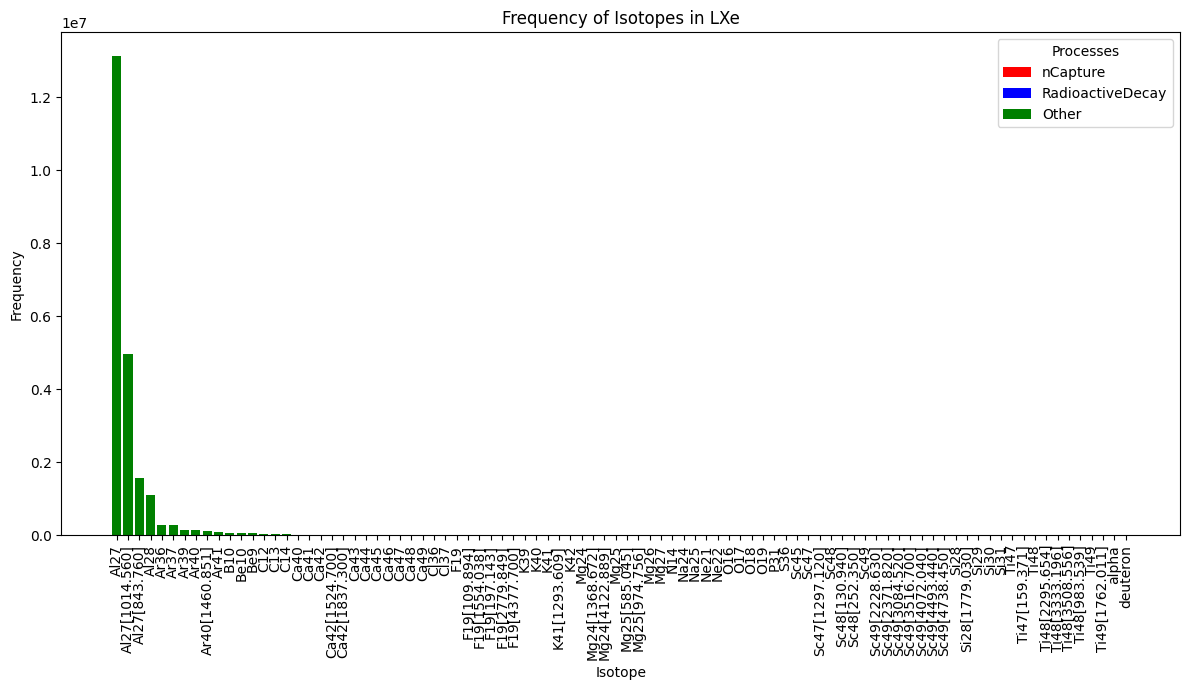

In [23]:

volume = aw.flatten(data['NAct_volume'])

mask = (volume == 'RockPhysicalVolume').to_numpy()  # Convert to NumPy array for proper indexing
elements = aw.to_numpy(aw.flatten(data['NAct_name'])[mask])
processes = aw.to_numpy(aw.flatten(data['NAct_process'])[mask])

unique_elements = np.unique(elements)  

counted_elements = pd.Series(elements).value_counts()

print(counted_elements)

colors = [
    'red' if process == 'nCapture' else 
    'blue' if process == 'RadioactiveDecay' else 
    'green'  # Standardfarbe für alle anderen Prozesse
    for process in processes
]

plt.figure(figsize=(12, 7))
plt.bar(unique_elements, counted_elements.values, color=colors)

plt.xlabel('Isotope')
plt.ylabel('Frequency')
plt.title('Frequency of Isotopes in LXe')

x_positions = np.arange(len(unique_elements)) + np.linspace(0, 0.1, len(unique_elements))
plt.xticks(ticks = x_positions, fontsize=10, rotation=90, labels=unique_elements)

legend_elements = [
    matplotlib.patches.Patch(facecolor='red', label='nCapture'),
    matplotlib.patches.Patch(facecolor='blue', label='RadioactiveDecay'),
    matplotlib.patches.Patch(facecolor='green', label='Other')
]
plt.legend(handles=legend_elements, title="Processes")

plt.tight_layout()

plt.show()